<a href="https://colab.research.google.com/github/rocket0l4/Coin-fetch-by-api/blob/main/polygon_Matic__USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using CoinCap API
- Code for Ethereum

In [ ]:
import requests
import csv
import json

url = "http://api.coincap.io/v2/assets/polygon/history?interval=h12"
# url = "http://api.coincap.io/v2/rates/bitcoin"

# url = "http://ws.coincap.io/prices?assets=bitcoin"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

json_data = json.loads(response.text.encode('utf8'))

print(response.text)


{"data":[{"priceUsd":"0.5125334272820316","time":1697673600000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-19T00:00:00.000Z"},{"priceUsd":"0.5119814268208852","time":1697716800000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-19T12:00:00.000Z"},{"priceUsd":"0.5187328104706448","time":1697760000000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-20T00:00:00.000Z"},{"priceUsd":"0.5406775678715098","time":1697803200000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-20T12:00:00.000Z"},{"priceUsd":"0.5366584305206177","time":1697846400000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-21T00:00:00.000Z"},{"priceUsd":"0.5566159416890662","time":1697889600000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-21T12:00:00.000Z"},{"priceUsd":"0.5733719242983728","time":1697932800000,"circulatingSupply":"9299803030.7193800000000000","date":"2023-10-22T00:00:00.000Z"},{"priceUsd":"0.561

In [ ]:
# import requests
# import csv
# import json

# url = "http://api.coincap.io/v2/candles?exchange=poloniex&interval=h8&baseId=ethereum&quoteId=bitcoin"

# payload={}
# headers = {}

# response = requests.request("GET", url, headers=headers, data=payload)
# json_data = json.loads(response.text.encode('utf8'))

# print(response.text)


#Storing the data

In [ ]:
matic_data = json_data['data']

In [ ]:
import pandas as pd
df = pd.DataFrame(matic_data)

In [ ]:
df.head()

,priceUsd,time,circulatingSupply,date
0,0.5125334272820316,1697673600000,9299803030.7193800000000000,2023-10-19T00:00:00.000Z
1,0.5119814268208852,1697716800000,9299803030.7193800000000000,2023-10-19T12:00:00.000Z
2,0.5187328104706448,1697760000000,9299803030.7193800000000000,2023-10-20T00:00:00.000Z
3,0.5406775678715098,1697803200000,9299803030.7193800000000000,2023-10-20T12:00:00.000Z
4,0.5366584305206177,1697846400000,9299803030.7193800000000000,2023-10-21T00:00:00.000Z


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   priceUsd           730 non-null    object
 1   time               730 non-null    int64 
 2   circulatingSupply  730 non-null    object
 3   date               730 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.9+ KB


In [ ]:
# df = pd.DataFrame(ethereum_data, columns=['priceUsd','time'])
# df

In [ ]:
# df['dates'] = pd.to_datetime(df['time'],unit = 'ms')
# df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   priceUsd           730 non-null    object
 1   time               730 non-null    int64 
 2   circulatingSupply  730 non-null    object
 3   date               730 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.9+ KB


#Only required columns saved

In [ ]:
df = pd.DataFrame(matic_data, columns=['priceUsd','date'])
df

,priceUsd,date
0,0.5125334272820316,2023-10-19T00:00:00.000Z
1,0.5119814268208852,2023-10-19T12:00:00.000Z
2,0.5187328104706448,2023-10-20T00:00:00.000Z
3,0.5406775678715098,2023-10-20T12:00:00.000Z
4,0.5366584305206177,2023-10-21T00:00:00.000Z
...,...,...
725,0.3794478868359068,2024-10-15T12:00:00.000Z
726,0.3797825874203446,2024-10-16T00:00:00.000Z
727,0.3801921756274572,2024-10-16T12:00:00.000Z
728,0.3712157907177044,2024-10-17T00:00:00.000Z


#Converting into Datetime format

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   priceUsd  730 non-null    object             
 1   date      730 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 11.5+ KB


In [ ]:
df['date'] = df['date'].dt.tz_localize(None)
df

,priceUsd,date
0,0.5125334272820316,2023-10-19 00:00:00
1,0.5119814268208852,2023-10-19 12:00:00
2,0.5187328104706448,2023-10-20 00:00:00
3,0.5406775678715098,2023-10-20 12:00:00
4,0.5366584305206177,2023-10-21 00:00:00
...,...,...
725,0.3794478868359068,2024-10-15 12:00:00
726,0.3797825874203446,2024-10-16 00:00:00
727,0.3801921756274572,2024-10-16 12:00:00
728,0.3712157907177044,2024-10-17 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  730 non-null    object        
 1   date      730 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 11.5+ KB


#Changing dataype from Obj to Float

In [ ]:
df['priceUsd'] = pd.to_numeric(df['priceUsd'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  730 non-null    float64       
 1   date      730 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [ ]:
df

,priceUsd,date
0,0.512533,2023-10-19 00:00:00
1,0.511981,2023-10-19 12:00:00
2,0.518733,2023-10-20 00:00:00
3,0.540678,2023-10-20 12:00:00
4,0.536658,2023-10-21 00:00:00
...,...,...
725,0.379448,2024-10-15 12:00:00
726,0.379783,2024-10-16 00:00:00
727,0.380192,2024-10-16 12:00:00
728,0.371216,2024-10-17 00:00:00


#Visualization

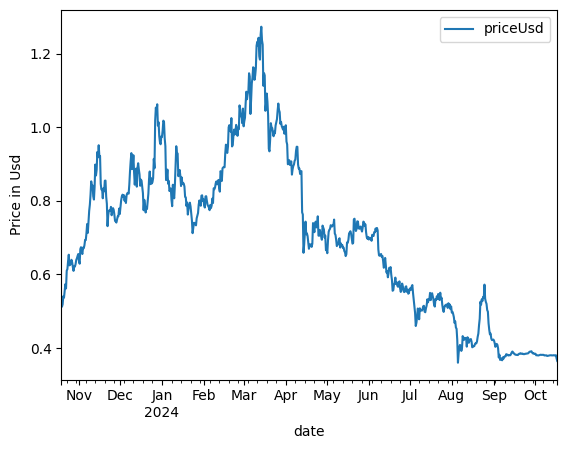

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='date',y = 'priceUsd',kind = 'line')
plt.ylabel('Price in Usd')
plt.show()

In [ ]:
df.to_csv('matic-usd price.csv',index = False)